## EE 461P: Data Science Principles  
### Assignment 2 
### Total points: 60
### Due: Thursday, Feb 25, 2021, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Julian Fritz jjf2459
2. Simoni Maniar ssm3256

### Homework group No.: 2

# Question 1 - Cross Validation (15 pts)

Use the given code below to load the dataset from "data.csv". The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). This dataset was created for energy analysis using 12 different building shapes.The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. By simulating various settings as functions of the afore-mentioned characteristics in total there are 768 building shapes. For more information on the dataset refer this [link](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). The aim is to use the eight features to predict one of the two responses.In this question, we will predict only the y1 response. 

Specifically:
* X1 - Relative Compactness
* X2 - Surface Area
* X3 - Wall Area
* X4 - Roof Area
* X5 - Overall Height
* X6 - Orientation
* X7 - Glazing Area
* X8 - Glazing Area Distribution
* y1 - Heating Load
* y2 - Cooling Load






In [1]:
import pandas as pd
import numpy as np 
import sklearn

data = pd.read_csv("data_qn1.csv",delimiter=",")
y = data["Y1"]
X = data.drop(columns=["Y1","Y2"])


We will be analyzing the following scenarios for the given dataset.

* Compare hold-out(80:20) train-test split cross validation and K-Fold Cross Validation 
* What happens when the number of folds increase for K-Fold Cross Validation? 
* Variance in the prediction for each case - Hold Out Validation and K-Fold Validation?



a) [**3 pts**] Split the original dataset(X,y) into 80:20 [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) split, use linear regression to fit the model on the training data and evaluate the model using the test data. Report the root mean squared error (RMSE) on the test data for five different runs, make sure to store the RMSE values, we will use these values later to plot in part (d).

b) [**3 pts**] Now, we will use [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) validation from sklearn to split the original data(X,y) into 5 folds. For each fold use linear regression to fit the model on training data and evaluate the model on the test data. Compute the average RMSE of the 5 folds, repeat the same for five different random splits of K-Fold. You can refer to the following line of code to perform the split. Make sure to vary the random_state value for five different runs. Record the RMSE values we will use them later in part (d).

```
kf = KFold(n_splits=5,random_state=random_state,shuffle=True)
```

c) [**3 pts**] Repeat the same experiment as in part (b) by varying the number of folds as k = 100,768 and record the RMSE for each value of k.

d) [**3 pts**] Now, we will plot the box plot of the RMSE values obtained from part a), b) and c) together in a single figure. To reiterate, Hold out Validation(from part a) and k = 5, 100 and 768(part b and c) each with 5 values of RMSE for the 5 random states of the k-fold split. You can refer [here](https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) on how to plot the boxplots. Boxplots are used to understand the variance in the values of the RMSE. For more information on box plots refer this [link](https://en.wikipedia.org/wiki/Box_plot). 

e) [**3 pts**] Using the boxplot answer the following questions,

* What do you observe in the variation for RMSE of hold out validation and k-Fold validation, explain with reasoning which one will you choose to evaluate the model.

* What happens when the number of folds increase to larger values?



### Part a)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
RMSE = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linReg = LinearRegression().fit(X_train, y_train)
    y_pred = linReg.predict(X_test)
    rmse = mean_squared_error(y_pred, y_test, squared=False)
    RMSE.append(rmse)

In [4]:
RMSE

[3.096913414279386,
 3.019268530802652,
 2.747544181849965,
 2.8841905776345396,
 3.206018203009193]

### Part b)

In [5]:
from sklearn.model_selection import KFold

In [6]:
Xnp = X.to_numpy()
ynp = y.to_numpy()

In [7]:
ynp.shape

(768,)

In [8]:
RMSE5folds = []

for i in range(5):  #repeated for 5 different random splits of kfold
    
    kf = KFold(n_splits=5,random_state=None,shuffle=True) #None means random every time (its also the default)
    avgrmse = 0
    
    for train_idx, test_idx in kf.split(Xnp, ynp):
        X_train_fold, X_test_fold = Xnp[train_idx,:], Xnp[test_idx,:]
        y_train_fold, y_test_fold = ynp[train_idx], ynp[test_idx]

        linReg = LinearRegression().fit(Xnp[train_idx,:], ynp[train_idx])
        y_pred = linReg.predict(Xnp[test_idx,:])
        rmse = mean_squared_error(y_pred, ynp[test_idx], squared=False)
        avgrmse += rmse
        
    avgrmse /= 5
    RMSE5folds.append(avgrmse)


In [9]:
RMSE5folds

[2.9603650598737,
 2.9497721375775257,
 2.9490613072225513,
 2.9374311906888324,
 2.957540868132636]

### Part c)

In [10]:
# exactly the same as part b except n_splits is 100 and 768
RMSE100folds = []
k = 100
for i in range(5):  #repeated for 5 different random splits of kfold
    
    kf = KFold(n_splits = k, random_state=None, shuffle=True) #None means random every time (its also the default)
    avgrmse = 0
    
    for train_idx, test_idx in kf.split(Xnp, ynp):
        X_train_fold, X_test_fold = Xnp[train_idx,:], Xnp[test_idx,:]
        y_train_fold, y_test_fold = ynp[train_idx], ynp[test_idx]

        linReg = LinearRegression().fit(Xnp[train_idx,:], ynp[train_idx])
        y_pred = linReg.predict(Xnp[test_idx,:])
        rmse = mean_squared_error(y_pred, ynp[test_idx], squared=False)
        avgrmse += rmse
        
    avgrmse /= k
    RMSE100folds.append(avgrmse)
    
RMSE768folds = []
k = 768
for i in range(5):  #repeated for 5 different random splits of kfold
    
    kf = KFold(n_splits = k, random_state=None, shuffle=True) #None means random every time (its also the default)
    avgrmse = 0
    
    for train_idx, test_idx in kf.split(Xnp, ynp):
        X_train_fold, X_test_fold = Xnp[train_idx,:], Xnp[test_idx,:]
        y_train_fold, y_test_fold = ynp[train_idx], ynp[test_idx]

        linReg = LinearRegression().fit(Xnp[train_idx,:], ynp[train_idx])
        y_pred = linReg.predict(Xnp[test_idx,:])
        rmse = mean_squared_error(y_pred, ynp[test_idx], squared=False)
        avgrmse += rmse
        
    avgrmse /= k
    RMSE768folds.append(avgrmse)

In [11]:
print(RMSE100folds)
print(RMSE768folds)

[2.8293851685152474, 2.7733295678929473, 2.8018822242273442, 2.8058984786665606, 2.808773047613918]
[2.120513780365928, 2.120513780365928, 2.120513780365925, 2.1205137803659264, 2.120513780365927]


### Part d)

In [12]:
import matplotlib.pyplot as plt

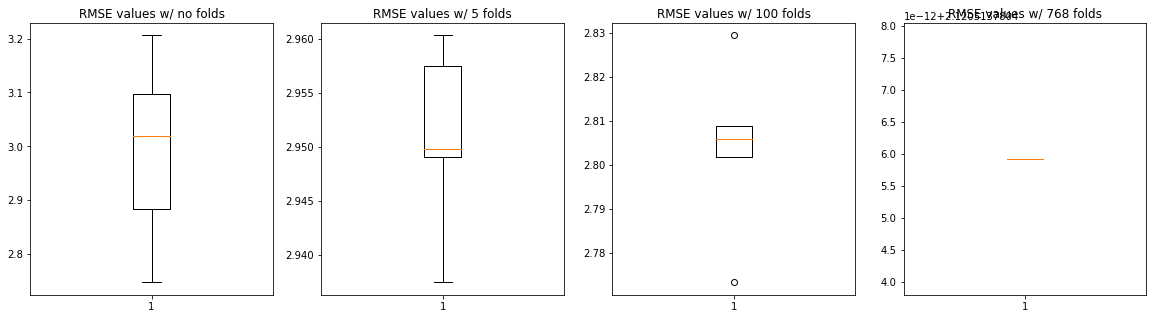

In [13]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20,5))
ax0.set_title('RMSE values w/ no folds')
ax1.set_title('RMSE values w/ 5 folds')
ax2.set_title('RMSE values w/ 100 folds')
ax3.set_title('RMSE values w/ 768 folds')
ax0.boxplot(RMSE)
ax1.boxplot(RMSE5folds)
ax2.boxplot(RMSE100folds)
ax3.boxplot(RMSE768folds)
print()

### Part e)

What do you observe in the variation for RMSE of hold out validation and k-Fold validation, explain with reasoning which one will you choose to evaluate the model.  
What happens when the number of folds increase to larger values?  

The variation in RMSE for the hold out validation is the greatest, and k-Fold reduces the variation as k increases. If we replot the box plots with a shared y axis (below), we can see visually how much more variation there is when there are fewer/no folds. For evaluating the model I would use k-Fold validation with 5 folds because 5 folds most likely has the best bias-variance tradeoff. Using 768 folds has low error and no variation in the error, but it's overfitting because for each fold the test set is only one sample, so the model only has to predict one sample each time so of course the error will be lower. If the model was then used to predict many samples, you don't know how well it would perform because you evaluated your model with only testing very few samples. So using 5 folds is the best evaluation because the RMSE is pretty consistent and it's testing using 20% of the data each time so that's enough samples for a fair evaluation of the model's error.

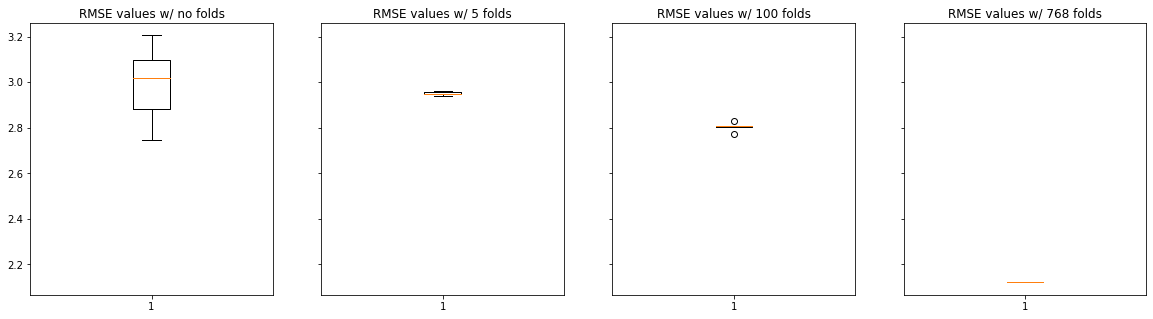

In [14]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20,5), sharey='row')
ax0.set_title('RMSE values w/ no folds')
ax1.set_title('RMSE values w/ 5 folds')
ax2.set_title('RMSE values w/ 100 folds')
ax3.set_title('RMSE values w/ 768 folds')
ax0.boxplot(RMSE)
ax1.boxplot(RMSE5folds)
ax2.boxplot(RMSE100folds)
ax3.boxplot(RMSE768folds)
print()

# Question 2 - Bias Variance TradeOff (10 pts)

a) [**5pts**] What is the difference between the notion of model bias (for example, a model that predicts age as a function of some other features) and the bias of a point estimator (for example, the mean age of students estimated from a sample of age values)?

b) [**5pts**] a) Assume you have a model trained to solve a problem. How do you expect (i) the bias and (ii) the variance to change if you used a larger training dataset, but no other process changed?




a)
Model Bias is computed by subtracting the average answer from the true performance (best possible) answer. Thus, the model bias describes how well much the average varies from the best answer. Since a point estimator is a value that is used on a sample to estimate a value for a population, bias of a point estimator is the difference between the estimated value (calculated from a sample) and the actual value for the population. Thus, bias of a point estimator can be used to determine if our estimated value reflects the actual value of the population. Model bias differs from bias of a point estimator in that it can be changed depending on the complexity, coefficients, optimization, etc. of the model. The bias of a point estimator cannot be controlled - for example, the variance of a sample will always underestimate the true variance. 

b)
i) The bias will not change as it is not affected but the number of data. Consider the example we did in class: if you have Person A taking a sample size of 1 and Person B taking a sample size of 1000, and the population size is 50,000, and both people are taking infinite samples, both people will converge to the true answer. 
ii) The variance will decrease since consistent estimators converge to the ideal solution. 

# Question 3: Ridge and Lasso Regression (15 points)

In this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the following code to load the train and test data.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

df = pd.read_csv("data_qn3.csv", index_col=0)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()

# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)


## Question 3.1 (3 points) 
Run Linear regression on the train dataset and print the $R^2$ value using the test dataset.

## Question 3.2 (6 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present. Plot the coefficients of the lasso model for different alpha values, you can use log scale to plot the alphas in the x_axis.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Question 3.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Ridge model.Plot the coefficients of the ridge model for different alpha values, you can use log scale to plot the alphas in the x_axis.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42



### 3.1)

In [16]:
linReg = LinearRegression().fit(X_train,y_train)
Rsq = linReg.score(X_test,y_test)
print(Rsq)

0.8355055233743603


### 3.2)

In [17]:
from sklearn.linear_model import Ridge, Lasso

In [18]:
alphas=10**np.linspace(1,-2,100)*0.5

scores = [Lasso(alpha = a, copy_X=True, normalize=True, random_state=42).fit(X_train,y_train).score(X_test,y_test)
          for a in alphas]

In [19]:
print("Best alpha value:", alphas[np.argmax(scores)])
print("Corresponding best R^2 value:", np.max(scores))

Best alpha value: 0.01424017934217901
Corresponding best R^2 value: 0.8524831845218706


In [20]:
#storing best model
model_lasso = Lasso(alpha = alphas[np.argmax(scores)], copy_X=True, normalize=True, random_state=42).fit(X_train,y_train)

In [21]:
X_train_lasso = X_train.iloc[:,model_lasso.coef_!=0]
X_test_lasso = X_test.iloc[:,model_lasso.coef_!=0]

print("Number of nonzero columns:" ,sum(model_lasso.coef_!=0))

Number of nonzero columns: 11


In [22]:
coefMatrix = np.array([])
for a in alphas:
    lassomodel = Lasso(alpha = a, copy_X=True, normalize=True, random_state=42).fit(X_train,y_train)
    coefs = lassomodel.coef_
    coefMatrix = np.append(coefMatrix, coefs)
    

In [23]:
coefMatrix = coefMatrix.reshape(100,20)

<Figure size 432x288 with 0 Axes>

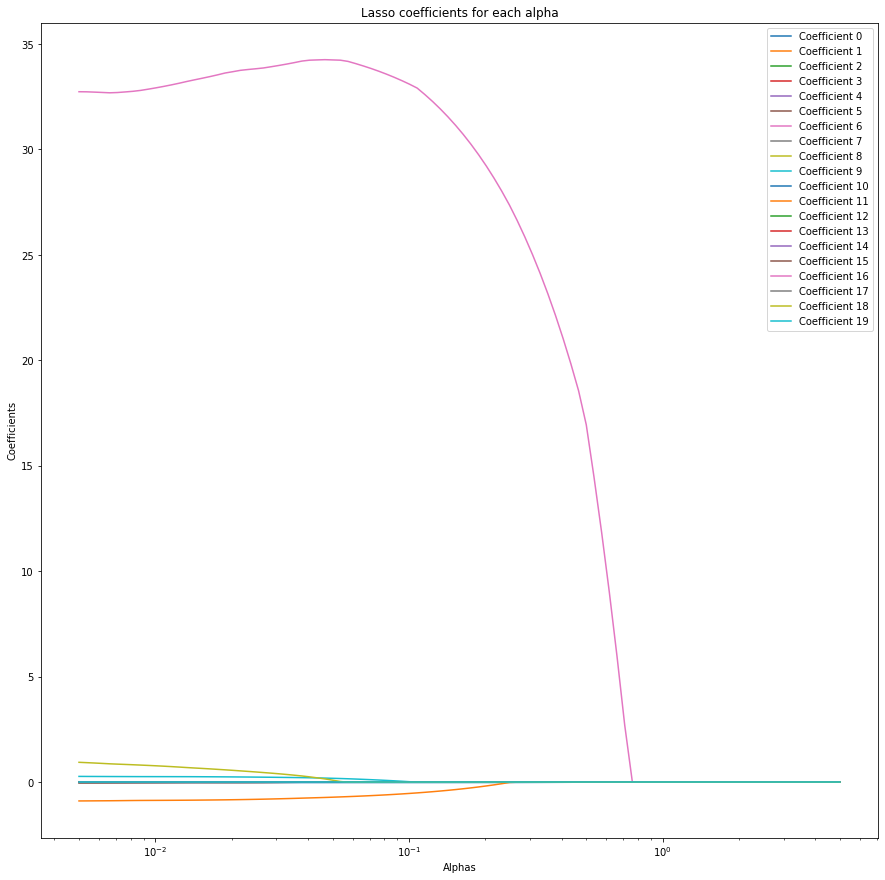

In [24]:
plt.figure(0)
plt.figure(figsize=(15, 15))
plt.title("Lasso coefficients for each alpha");
plt.xlabel("Alphas");
plt.ylabel("Coefficients");
plt.xscale('log')
coefidx = 0
for a in range(20):
    plt.plot(alphas, coefMatrix[:,coefidx], label='Coefficient ' + str(coefidx))
    coefidx += 1
    
plt.legend(loc="best")

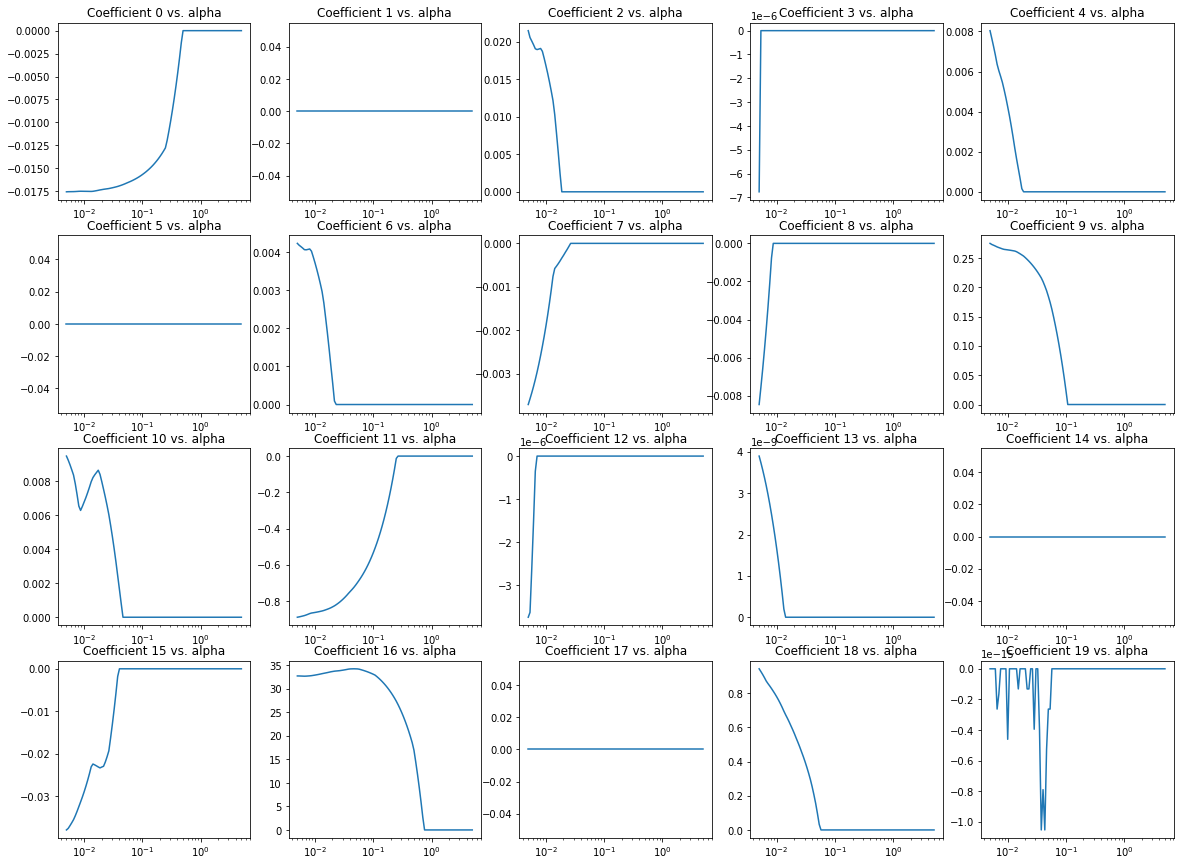

In [25]:
#axes = [[ax1,ax2,ax3,ax4,ax5],[ax6,ax7,ax8,ax9,ax10],[ax11,ax12,ax13,ax14,ax15],[ax16,ax17,ax18,ax19,ax20]]
fig1, axes = plt.subplots(4,5, figsize=(20,15))

coefidx = 0
for v in range(4):
    for h in range(5):
        axes[v,h].set_xscale('log')
        axes[v,h].set_title('Coefficient ' + str(coefidx) + ' vs. alpha')
        axes[v,h].plot(alphas,coefMatrix[:,coefidx])
        coefidx += 1


### 3.3)

In [26]:
alphas=10**np.linspace(1,-2,100)*0.5

scores = [Ridge(alpha = a, copy_X=True, normalize=True, random_state=42).fit(X_train,y_train).score(X_test,y_test)
          for a in alphas]

In [27]:
print("Best alpha value:", alphas[np.argmax(scores)])
print("Corresponding best R^2 value:", np.max(scores))

Best alpha value: 0.005
Corresponding best R^2 value: 0.8339476898269709


In [28]:
coefMatrix = np.array([])
for a in alphas:
    ridgemodel = Ridge(alpha = a, copy_X=True, normalize=True, random_state=42).fit(X_train,y_train)
    coefs = ridgemodel.coef_
    coefMatrix = np.append(coefMatrix, coefs)
    

In [29]:
coefMatrix = coefMatrix.reshape(100,20)

<Figure size 432x288 with 0 Axes>

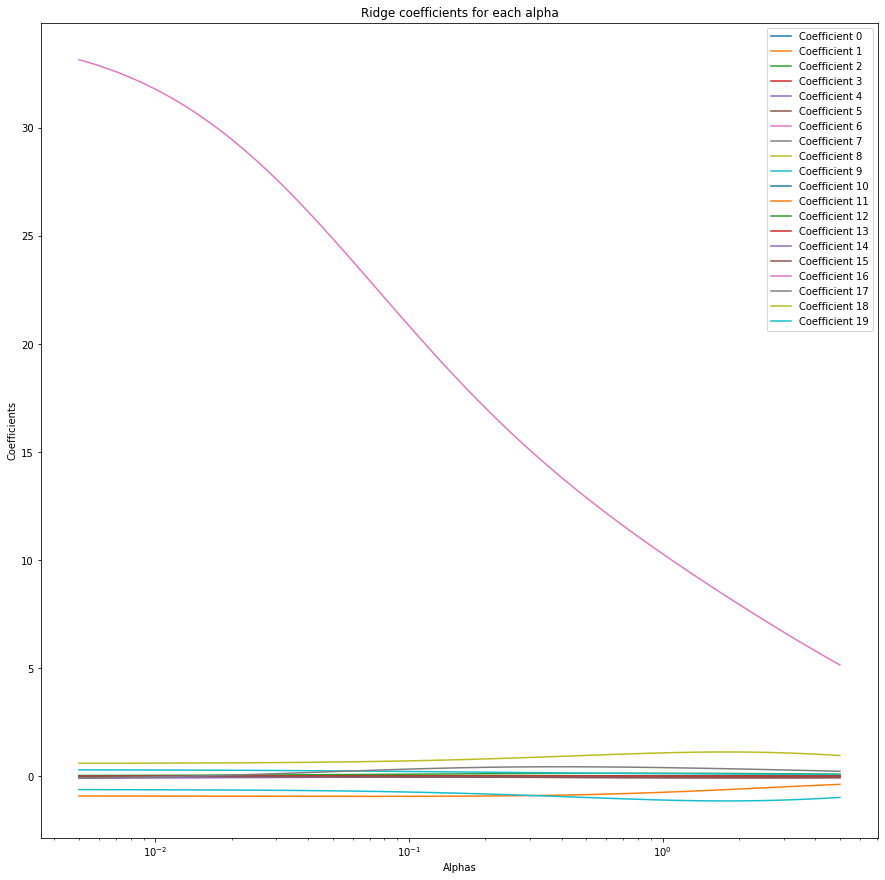

In [30]:
plt.figure(0)
plt.figure(figsize=(15, 15))
plt.title("Ridge coefficients for each alpha");
plt.xlabel("Alphas");
plt.ylabel("Coefficients");
plt.xscale('log')
coefidx = 0
for a in range(20):
    plt.plot(alphas, coefMatrix[:,coefidx], label='Coefficient ' + str(coefidx))
    coefidx += 1
    
plt.legend(loc="best")

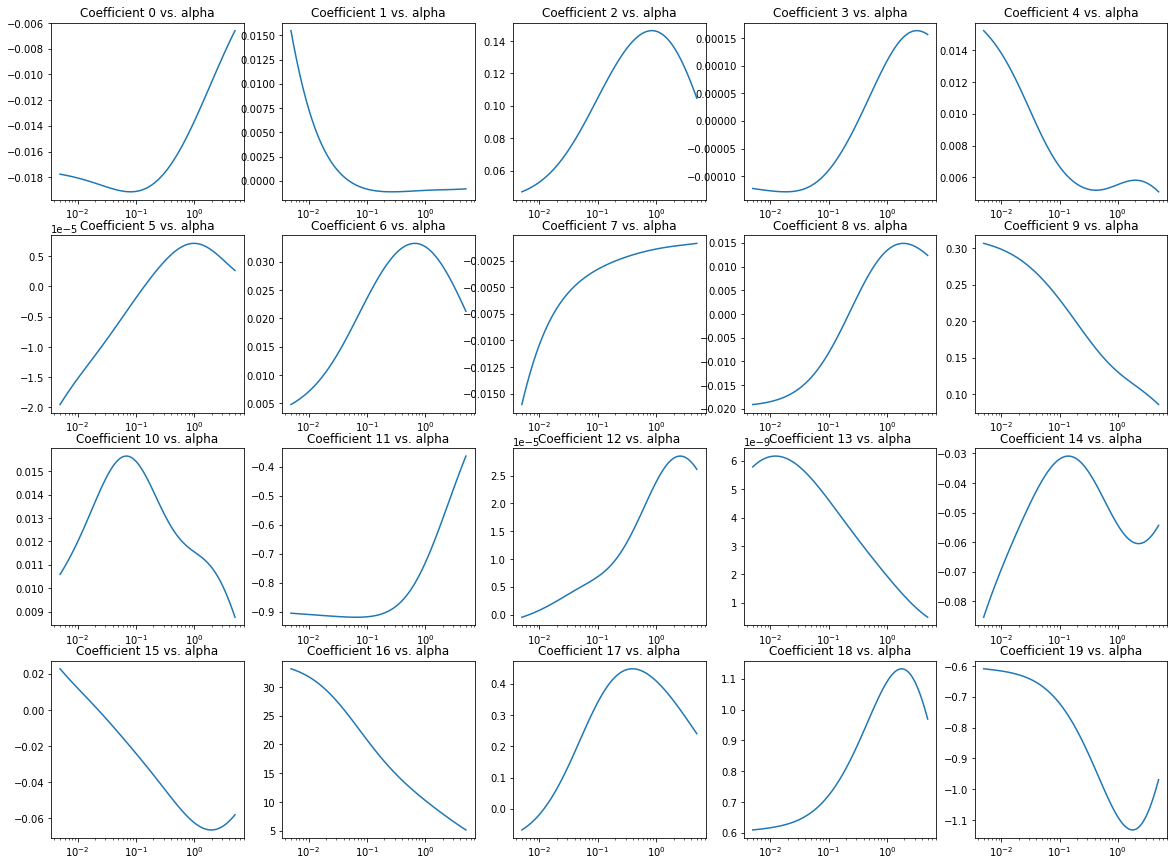

In [31]:
#axes = [[ax1,ax2,ax3,ax4,ax5],[ax6,ax7,ax8,ax9,ax10],[ax11,ax12,ax13,ax14,ax15],[ax16,ax17,ax18,ax19,ax20]]
fig1, axes = plt.subplots(4,5, figsize=(20,15))

coefidx = 0
for v in range(4):
    for h in range(5):
        axes[v,h].set_xscale('log')
        axes[v,h].set_title('Coefficient ' + str(coefidx) + ' vs. alpha')
        axes[v,h].plot(alphas,coefMatrix[:,coefidx])
        coefidx += 1


# Question 4: Polynomial Feature Transformation (20 points) 
Often, you will find that transforming features into higher degrees will yield better models. In this question, we will see how to do non-linear regression using a linear model by using polynomial feature transformation. You will need to build only one plot for this entire question. So, plot everything on the same plot. Let us now consider the following dataset:



In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(2)

def h(x):
    """ function to approximate by polynomial interpolation"""
    return np.sin(x) + np.log(x) 


# generate points used to plot
x_plot = np.linspace(2, 12, 100)

# generate points and keep a subset of them
x = np.linspace(2, 12, 100)

rng = np.random.RandomState(20)
rng.shuffle(x)

x_train = np.sort(x[:50])
x_test = np.sort(x[50:80])



# create matrix versions of these arrays
x_train = x_train[:, np.newaxis]
x_test = x_test[:,np.newaxis]
x_plot = x_plot[:, np.newaxis]

y_train = h(x_train) + np.random.normal(0, 0.5, size=x_train.shape) 
y_test = h(x_test)+ np.random.normal(0, 0.5, size=x_test.shape) 



1. Build a scatter plot with `s=30` and `marker='o'` using x_train and y_train. Also, build a line plot using `x_plot` and `h(x_plot)` to show the trend. (5 pts)
2. Transform `x_train` and `x_test` using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) with degrees 1,3,5,7,9,11 and save these transformed datasets. For example, if an input sample is two dimensional and of the form [$a$, $b$], the degree-2 polynomial features are [$1$, $a$, $b$, $a^2$, $ab$, $b^2$]. (5 pts)
3. Use ridge regression with default parameters on each of these train datasets. Now, calculate the predicted target values for the fitted model using `.predict(X_plot)` and show line plots using `x_plot` and the predicted target values. Also, calculate the training MSE and test MSE for each of them using the model. (5 pts)
4. Report your observations from the plot w.r.t how the evaluation metrics change on increasing the `degree` parameter. What do you think will happen if we keep on increasing the value of `degree`? (5 pts)

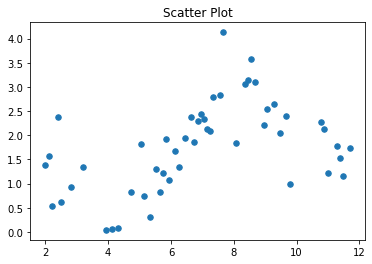

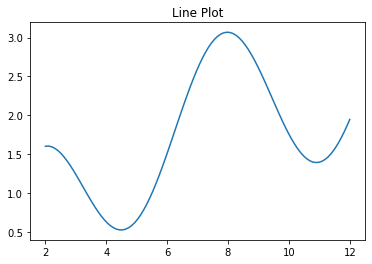

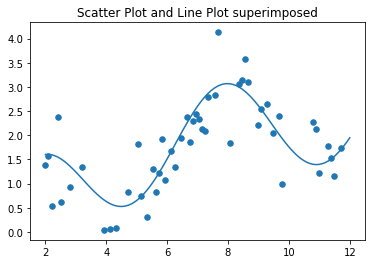

In [33]:
#4.1
plt.figure(0)
plt.title('Scatter Plot')
plt.scatter(x_train, y_train, s=30, marker='o')
plt.figure(1)
plt.title('Line Plot')
plt.plot(x_plot, h(x_plot))
plt.figure(2)
plt.title('Scatter Plot and Line Plot superimposed')
plt.scatter(x_train, y_train, s=30, marker='o')
plt.plot(x_plot, h(x_plot))

In [34]:
#4.2
#degrees 1,3,5,7,9,11 

#degree 1;
x_test_1 = PolynomialFeatures(1)
x_test_1_transformed = x_test_1.fit_transform(x_test)
x_train_1 = PolynomialFeatures(1)
x_train_1_transformed = x_train_1.fit_transform(x_train)
x_plot_1_transformed = PolynomialFeatures(1).fit_transform(x_plot)

#degree 3;
x_test_3 = PolynomialFeatures(3)
x_test_3_transformed = x_test_3.fit_transform(x_test)
x_train_3 = PolynomialFeatures(3)
x_train_3_transformed = x_train_3.fit_transform(x_train)
x_plot_3_transformed = PolynomialFeatures(3).fit_transform(x_plot)

#degree 5;
x_test_5 = PolynomialFeatures(5)
x_test_5_transformed = x_test_5.fit_transform(x_test)
x_train_5 = PolynomialFeatures(5)
x_train_5_transformed = x_train_5.fit_transform(x_train)
x_plot_5_transformed = PolynomialFeatures(5).fit_transform(x_plot)

#degree 7;
x_test_7 = PolynomialFeatures(7)
x_test_7_transformed = x_test_7.fit_transform(x_test)
x_train_7 = PolynomialFeatures(7)
x_train_7_transformed = x_train_7.fit_transform(x_train)
x_plot_7_transformed = PolynomialFeatures(7).fit_transform(x_plot)

#degree 9;
x_test_9 = PolynomialFeatures(9)
x_test_9_transformed = x_test_9.fit_transform(x_test)
x_train_9 = PolynomialFeatures(9)
x_train_9_transformed = x_train_9.fit_transform(x_train)
x_plot_9_transformed = PolynomialFeatures(9).fit_transform(x_plot)

#degree 11;
x_test_11 = PolynomialFeatures(11)
x_test_11_transformed = x_test_11.fit_transform(x_test)
x_train_11 = PolynomialFeatures(11)
x_train_11_transformed = x_train_11.fit_transform(x_train);
x_plot_11_transformed = PolynomialFeatures(11).fit_transform(x_plot)

MSE using train on Original: 0.6609726626128062
MSE using test on Original: 0.796584429187328
MSE using train on 1 degree: 0.6609726626128062
MSE using test on 1 degree: 0.796584429187328
MSE using train on 3 degree: 0.3804102617667322
MSE using test on 3 degree: 0.5281635294444168
MSE using train on 5 degree: 0.2694464356510802
MSE using test on 5 degree: 0.38024490313261966
MSE using train on 7 degree: 0.25695508044503335
MSE using test on 7 degree: 0.3375237704517655
MSE using train on 9 degree: 0.2479236021522185
MSE using test on 9 degree: 0.2725544582858799
MSE using train on 11 degree: 0.245070008417045
MSE using test on 11 degree: 0.3042108034415741


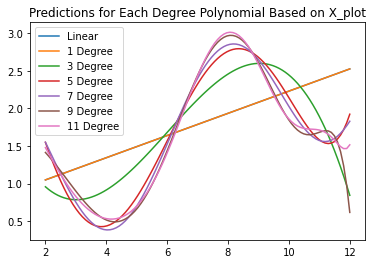

In [35]:
#4.3
from sklearn.metrics import mean_absolute_error,mean_squared_error
# og
reg = Ridge();
reg.fit(x_train, y_train);
y_predict_test = reg.predict(x_test);
y_predict_train = reg.predict(x_train);
print("MSE using train on Original:", mean_squared_error(y_train, y_predict_train))
print("MSE using test on Original:", mean_squared_error(y_test, y_predict_test))
y_predict_plot = reg.predict(x_plot)
plt.figure(0)
plt.title("Predictions for Each Degree Polynomial Based on X_plot")
plt.plot(x_plot, y_predict_plot, label="Linear")
#plt.plot(x_plot[50:80], y_predict_test, label="test");
#plt.plot(x_plot[:50], y_predict_train, label="train");
#plt.legend(loc="upper left")

reg_1 = Ridge();
reg_1.fit(x_train_1_transformed, y_train);
y_predict_1_test = reg_1.predict(x_test_1_transformed);
y_predict_1_train = reg_1.predict(x_train_1_transformed);
print("MSE using train on 1 degree:", mean_squared_error(y_train, y_predict_1_train))
print("MSE using test on 1 degree:", mean_squared_error(y_test, y_predict_1_test))
y_predict_1_plot = reg_1.predict(x_plot_1_transformed)
#plt.figure(1)
#plt.title("1 Degree")
plt.plot(x_plot, y_predict_1_plot, label="1 Degree")
#plt.plot(x_plot[50:80], y_predict_1_test, label="test");
#plt.plot(x_plot[:50], y_predict_1_train, label="train");
#plt.legend(loc="upper left")

reg_3 = Ridge();
reg_3.fit(x_train_3_transformed, y_train);
y_predict_3_test = reg_3.predict(x_test_3_transformed);
y_predict_3_train = reg_3.predict(x_train_3_transformed);
print("MSE using train on 3 degree:", mean_squared_error(y_train, y_predict_3_train))
print("MSE using test on 3 degree:", mean_squared_error(y_test, y_predict_3_test))
y_predict_3_plot = reg_3.predict(x_plot_3_transformed)
#plt.figure(2)
#plt.title("3 Degree")
plt.plot(x_plot, y_predict_3_plot, label="3 Degree")
#plt.plot(x_plot[50:80], y_predict_3_test, label="test");
#plt.plot(x_plot[:50], y_predict_3_train, label="train");
#plt.legend(loc="upper left")

reg_5 = Ridge();
reg_5.fit(x_train_5_transformed, y_train);
y_predict_5_test = reg_5.predict(x_test_5_transformed);
y_predict_5_train = reg_5.predict(x_train_5_transformed);
print("MSE using train on 5 degree:", mean_squared_error(y_train, y_predict_5_train))
print("MSE using test on 5 degree:", mean_squared_error(y_test, y_predict_5_test))
y_predict_5_plot = reg_5.predict(x_plot_5_transformed)
#plt.figure(3)
#plt.title("5 Degree")
plt.plot(x_plot, y_predict_5_plot, label="5 Degree")
#plt.plot(x_plot[50:80], y_predict_5_test, label="test");
#plt.plot(x_plot[:50], y_predict_5_train, label="train");
#plt.legend(loc="upper left")

reg_7 = Ridge();
reg_7.fit(x_train_7_transformed, y_train);
y_predict_7_test = reg_7.predict(x_test_7_transformed);
y_predict_7_train = reg_7.predict(x_train_7_transformed);
print("MSE using train on 7 degree:", mean_squared_error(y_train, y_predict_7_train))
print("MSE using test on 7 degree:", mean_squared_error(y_test, y_predict_7_test))
y_predict_7_plot = reg_7.predict(x_plot_7_transformed)
#plt.figure(4)
#plt.title("7 Degree")
plt.plot(x_plot, y_predict_7_plot, label="7 Degree")
#plt.plot(x_plot[50:80], y_predict_7_test, label="test");
#plt.plot(x_plot[:50], y_predict_7_train, label="train");
#plt.legend(loc="upper left")

reg_9 = Ridge();
reg_9.fit(x_train_9_transformed, y_train);
y_predict_9_test = reg_9.predict(x_test_9_transformed);
y_predict_9_train = reg_9.predict(x_train_9_transformed);
print("MSE using train on 9 degree:", mean_squared_error(y_train, y_predict_9_train))
print("MSE using test on 9 degree:", mean_squared_error(y_test, y_predict_9_test))
y_predict_9_plot = reg_9.predict(x_plot_9_transformed)
#plt.figure(5)
#plt.title("9 Degree")
plt.plot(x_plot, y_predict_9_plot, label="9 Degree")
#plt.plot(x_plot[50:80], y_predict_9_test, label="test");
#plt.plot(x_plot[:50], y_predict_9_train, label="train");
#plt.legend(loc="upper left")

reg_11 = Ridge();
reg_11.fit(x_train_11_transformed, y_train);
y_predict_11_test = reg_11.predict(x_test_11_transformed);
y_predict_11_train = reg_11.predict(x_train_11_transformed);
print("MSE using train on 11 degree:", mean_squared_error(y_train, y_predict_11_train))
print("MSE using test on 11 degree:", mean_squared_error(y_test, y_predict_11_test))
y_predict_11_plot = reg_11.predict(x_plot_11_transformed)
#plt.figure(6)
#plt.title("11 Degree")
plt.plot(x_plot, y_predict_11_plot, label="11 Degree")
#plt.plot(x_plot[50:80], y_predict_11_test, label="test");
#plt.plot(x_plot[:50], y_predict_11_train, label="train");
plt.legend(loc="upper left")


In [36]:
#4

Observations: The MSE for the train data set is monotonically decreasing as we add more degrees to the polynomial. This is because as you add more degrees to your polynomial it becomes easier to fit all of the data exactly. However, the MSE for the test data set starts increasing after a point. This indicicates that while a higher degreed polynomial might fit the data that is given, it is not the best fit for the overall model. In this dataset, the 9th degree polynomial is probably the best fit for the data as it starts overfitting once it reaches the 11th degree. 

What will happen if we keep increasing degree: The mean squared error for test will continue to increase while the mean squared error for train will continue to decrase. 